In [1]:
import numpy as np

In [2]:
def calculate_M_memory_two(player, coplayer):

    (
        p1,
        p2,
        p3,
        p4,
        p5,
        p6,
        p7,
        p8,
        p9,
        p10,
        p11,
        p12,
        p13,
        p14,
        p15,
        p16,
    ) = player
    (
        q1,
        q2,
        q3,
        q4,
        q5,
        q6,
        q7,
        q8,
        q9,
        q10,
        q11,
        q12,
        q13,
        q14,
        q15,
        q16,
    ) = coplayer

    M = np.zeros((16, 16))

    col, row = 0, 0

    for p, q in [[p1, q1], [p2, q3], [p3, q2], [p4, q4]]:
        for i, combo in enumerate(
            [(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]
        ):

            M[row, col + i] = combo

        col += 4
        row += 1

    col = 0
    for p, q in [[p5, q9], [p6, q11], [p7, q10], [p8, q12]]:
        for i, combo in enumerate(
            [(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]
        ):

            M[row, col + i] = combo

        col += 4
        row += 1

    col = 0
    for p, q in [[p9, q5], [p10, q7], [p11, q6], [p12, q8]]:
        for i, combo in enumerate(
            [(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]
        ):

            M[row, col + i] = combo

        col += 4
        row += 1

    col = 0
    for p, q in [[p13, q13], [p14, q15], [p15, q14], [p16, q16]]:
        for i, combo in enumerate(
            [(p * q), ((1 - q) * p), ((1 - p) * q), ((1 - p) * (1 - q))]
        ):

            M[row, col + i] = combo

        col += 4
        row += 1

    return M

In [3]:
import sympy as sym

In [4]:
Is, Js = np.where(calculate_M_memory_two(np.random.random((1, 16))[0], np.random.random((1, 16))[0]).round(3) > 0)

In [5]:
M = np.zeros((16, 16))

In [6]:
for i, j in zip(Is, Js):
    M[i, j] = 1

In [7]:
M

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,

In [8]:
import networkx as nx

In [9]:
G = nx.from_numpy_array(M, create_using=nx.DiGraph)

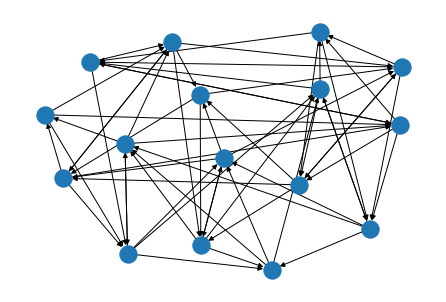

In [10]:
nx.draw(G)

In [11]:
for node in G.nodes():
    print(nx.shortest_path(G, node).keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
dict_keys([1, 4, 5, 6, 7, 0, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15])
dict_keys([2, 8, 9, 10, 11, 0, 1, 3, 4, 5, 6, 7, 12, 13, 14, 15])
dict_keys([3, 12, 13, 14, 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 15])
dict_keys([4, 0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
dict_keys([5, 4, 6, 7, 0, 1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15])
dict_keys([6, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 7, 12, 13, 14, 15])
dict_keys([7, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11])
dict_keys([8, 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15])
dict_keys([9, 4, 5, 6, 7, 0, 1, 2, 3, 8, 10, 11, 12, 13, 14, 15])
dict_keys([10, 8, 9, 11, 0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15])
dict_keys([11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dict_keys([12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15])
dict_keys([13, 4, 5, 6, 7, 0, 1, 2, 3, 8, 9, 10, 11, 12, 14, 15])
dict_keys([14, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15])
dict_keys(

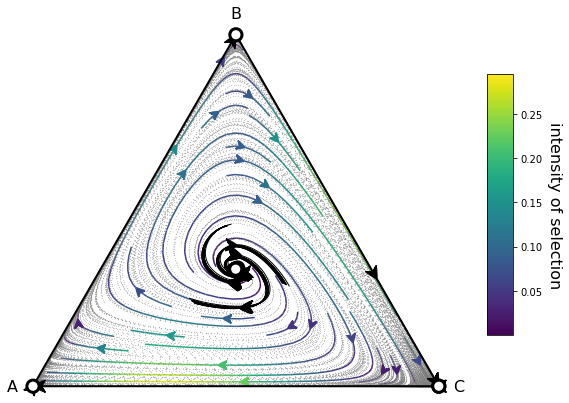

In [6]:
import numpy as np
import matplotlib.pyplot as plt


from egttools.plotting import plot_replicator_dynamics_in_simplex

payoffs =  np.array([[1, -1, 0], [1, 0, -1], [-1, 1, 0]])

type_labels = ['A', 'B', 'C']

fig, ax = plt.subplots(figsize=(10, 8))

simplex, gradient_function, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(payoffs, ax=ax)

plot = (simplex.add_axis(ax=ax)
        .draw_triangle()
        .draw_gradients(zorder=0)
        .add_colorbar()
        .add_vertex_labels(type_labels)
        .draw_stationary_points(roots_xy, stability)
        .draw_trajectory_from_roots(gradient_function,
                                    roots,
                                    stability,
                                    trajectory_length=15,
                                    linewidth=1,
                                    step=0.01,
                                    color='k', draw_arrow=True,
                                    arrowdirection='right',
                                    arrowsize=30, zorder=4, arrowstyle='fancy')
        .draw_scatter_shadow(gradient_function, 300, color='gray', marker='.', s=0.1, zorder=0)
        )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05, 1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

In [7]:
stability

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]